            Location  Year      Month  OrthoP (µg L-1)  Total P (ug L-1)
2        Piney Point  2021      April              274               319
3        Piney Point  2021        May               68               319
4        Piney Point  2021       June               50                82
5        Piney Point  2021       July               60                87
6        Piney Point  2021     August               67                80
7        Piney Point  2021  September               58                83
8        Piney Point  2021    October               55                79
9        Piney Point  2021   November               44                79
10       Piney Point  2021   December               44                63
11       Piney Point  2022    January               35                50
12       Piney Point  2022   February               29                38
13       Piney Point  2022      March               30                54
14       Piney Point  2022      April              

Text(0, 0.5, 'Frequency')

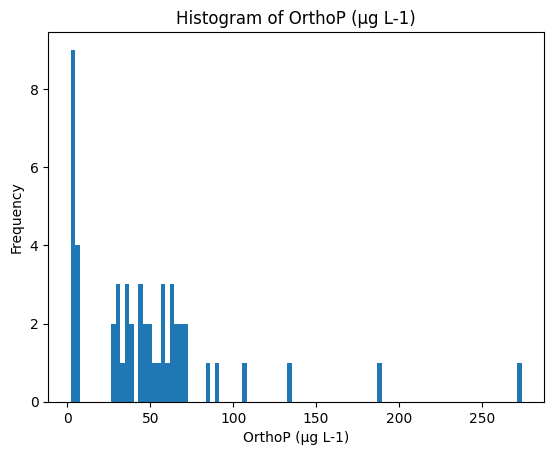

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, linregress
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

file=open("Tampa_Bay_Nutrient_Levels.csv")
data = pd.read_csv("Tampa_Bay_Nutrient_Levels.csv", sep=",")
data_2 = data.drop(columns=["NH4-N (mg L-1)", "NOx (mg L-1)", "TKN (mg L-1)"])
data_2["OrthoP (µg L-1)"] = data_2["OrthoP (µg L-1)"].astype(int)
data_2["Total P (ug L-1)"] = data_2["Total P (ug L-1)"].astype(int)
data_2 = data_2.iloc[2:]
print(data_2)
plt.hist(data_2["OrthoP (µg L-1)"], bins=100)
plt.title("Histogram of OrthoP (µg L-1)")
plt.xlabel("OrthoP (µg L-1)")
plt.ylabel("Frequency")
#plt.figure(figsize=(8, 6))

Text(0, 0.5, 'Frequency')

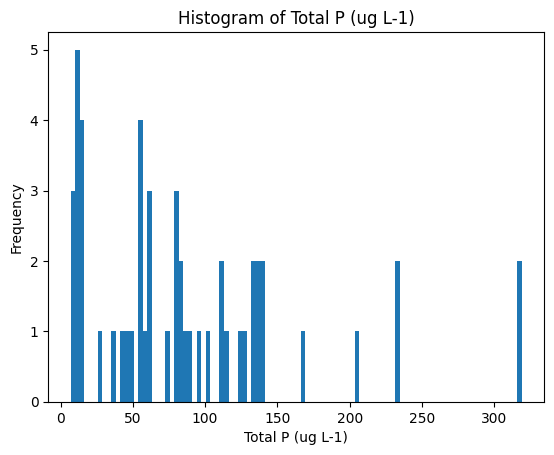

In [15]:
plt.hist(data_2["Total P (ug L-1)"], bins=100)
plt.title("Histogram of Total P (ug L-1)")
plt.xlabel("Total P (ug L-1)")
plt.ylabel("Frequency")

In [17]:
df = pd.DataFrame(data_2)
mean_orthop = df["OrthoP (µg L-1)"].mean()
print("Mean of OrthoP (µg L-1):", mean_orthop)
median_orthop = df["OrthoP (µg L-1)"].median()
print("Median of OrthoP (µg L-1):", median_orthop)
std_dev_orthop = df["OrthoP (µg L-1)"].std()
print("Standard Deviation of OrthoP (µg L-1):", std_dev_orthop)
mean_totalp = df["Total P (ug L-1)"].mean()
print("Mean of Total P (ug L-1):", mean_totalp)
median_totalp = df["Total P (ug L-1)"].median()
print("Median of Total P (ug L-1):", median_totalp)
std_dev_totalp = df["Total P (ug L-1)"].std()
print("Standard Deviation of Total P (ug L-1):", std_dev_totalp)

Mean of OrthoP (µg L-1): 2782.6296296296296
Median of OrthoP (µg L-1): 45.0
Standard Deviation of OrthoP (µg L-1): 19053.736714976247
Mean of Total P (ug L-1): 2964.1481481481483
Median of Total P (ug L-1): 79.0
Standard Deviation of Total P (ug L-1): 19115.984656142213


In [10]:
data_3 = data_2.drop(columns=["Location", "Year", "Month"])
data_4 = data_2.drop(columns=["Location", "OrthoP (µg L-1)", "Month"])
data_5 = data_2.drop(columns=["Location", "Total P (ug L-1)", "Month"])
vars = data_3.columns
vars_1 = data_4.columns
vars_2 = data_5.columns
for a in vars:
    for b in vars:
        if a != b:
            pearson_corr = pearsonr(data_3[a], data_3[b])[0]
            spearman_corr = spearmanr(data_3[a], data_3[b])[0]
            print(f"Pearson Correlation: {a} vs {b} is {pearson_corr:.2f}")
            print(f"Spearman Correlation: {a} vs {b} is {spearman_corr:.2f}")
            break
        break
for a in vars_1:
    for b in vars_1:
        if a != b:
            lin_reg = linregress(data_4[a], data_4[b])[1]
            print(f"Linear Regression: {a} vs {b} is -{lin_reg:.2f}")
            break
        break
for a in vars_2:
    for b in vars_2:
        if a != b:
            lin_reg = linregress(data_5[a], data_5[b])[1]
            print(f"Linear Regression: {a} vs {b} is -{lin_reg:.2f}")
            break
        break

Pearson Correlation: Total P (ug L-1) vs OrthoP (µg L-1) is 0.83
Spearman Correlation: Total P (ug L-1) vs OrthoP (µg L-1) is 0.91
Linear Regression: Total P (ug L-1) vs Year is -2021.49
Linear Regression: OrthoP (µg L-1) vs Year is -2021.46


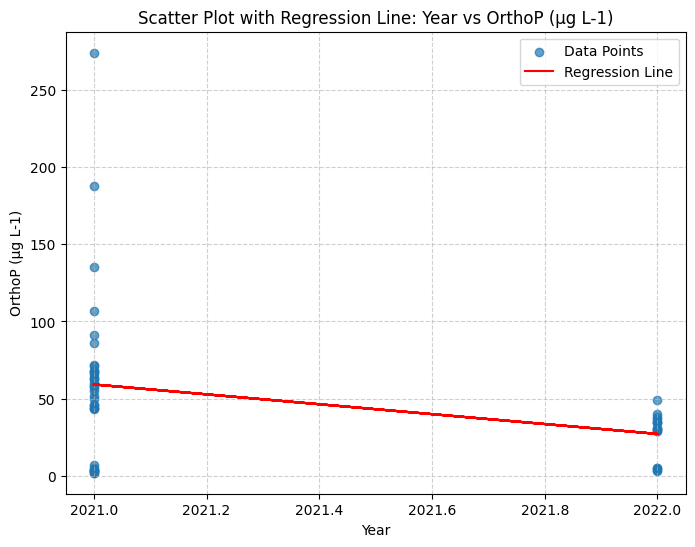

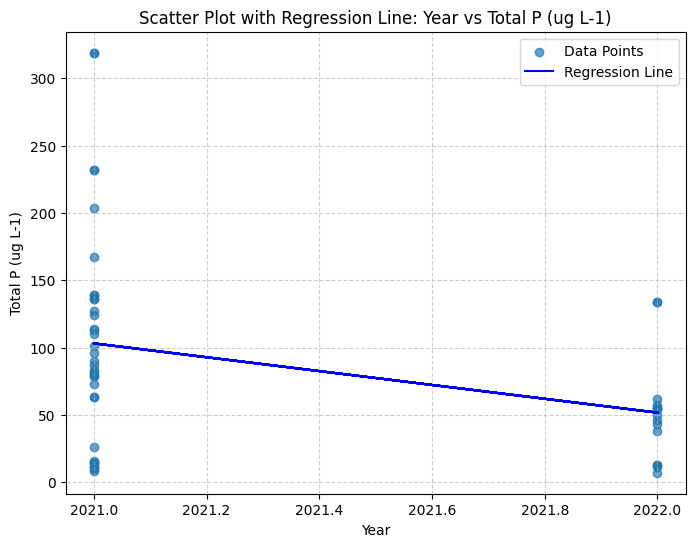

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

slope_orthop, intercept_orthop, _, _, _ = linregress(data_2["Year"], data_2["OrthoP (µg L-1)"])
plt.figure(figsize=(8, 6))
plt.scatter(data_2["Year"], data_2["OrthoP (µg L-1)"], alpha=0.7, label="Data Points")
plt.plot(data_2["Year"], slope_orthop * data_2["Year"] + intercept_orthop, color="red", label="Regression Line")
plt.title("Scatter Plot with Regression Line: Year vs OrthoP (µg L-1)")
plt.xlabel("Year")
plt.ylabel("OrthoP (µg L-1)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()
slope_totalp, intercept_totalp, _, _, _ = linregress(data_2["Year"], data_2["Total P (ug L-1)"])
plt.figure(figsize=(8, 6))
plt.scatter(data_2["Year"], data_2["Total P (ug L-1)"], alpha=0.7, label="Data Points")
plt.plot(data_2["Year"], slope_totalp * data_2["Year"] + intercept_totalp, color="blue", label="Regression Line")
plt.title("Scatter Plot with Regression Line: Year vs Total P (ug L-1)")
plt.xlabel("Year")
plt.ylabel("Total P (ug L-1)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

Text(0, 0.5, 'PC2 (8.68%)')

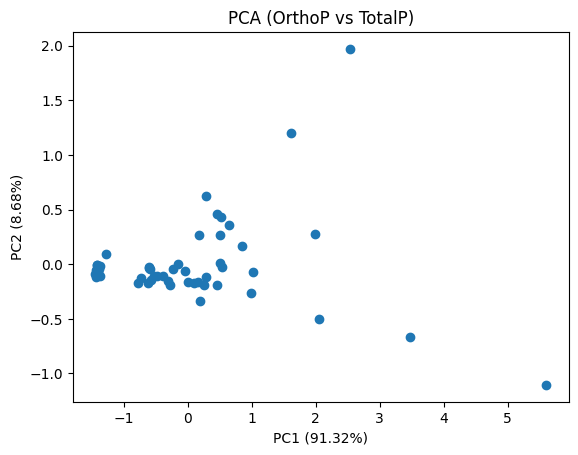

In [12]:
data_6 = data_2.drop(columns=["Month", "Year", "Location"])
PCX=0
PCY=1
fig, ax = plt.subplots()
scaler = StandardScaler()
solutes_1 = scaler.fit_transform(data_6)
pca_sol = PCA(n_components=2)
pca_sol_1 = pca_sol.fit_transform(solutes_1)
ax.scatter(pca_sol_1[:, PCX], pca_sol_1[:, PCY])
ax.set_title("PCA (OrthoP vs TotalP)")
label_X = "PC1 (" + str(np.round(pca_sol.explained_variance_ratio_[PCX]*100, decimals=2)) + "%)"
label_Y = "PC2 (" + str(np.round(pca_sol.explained_variance_ratio_[PCY]*100, decimals=2)) + "%)"
ax.set_xlabel(label_X)
ax.set_ylabel(label_Y)

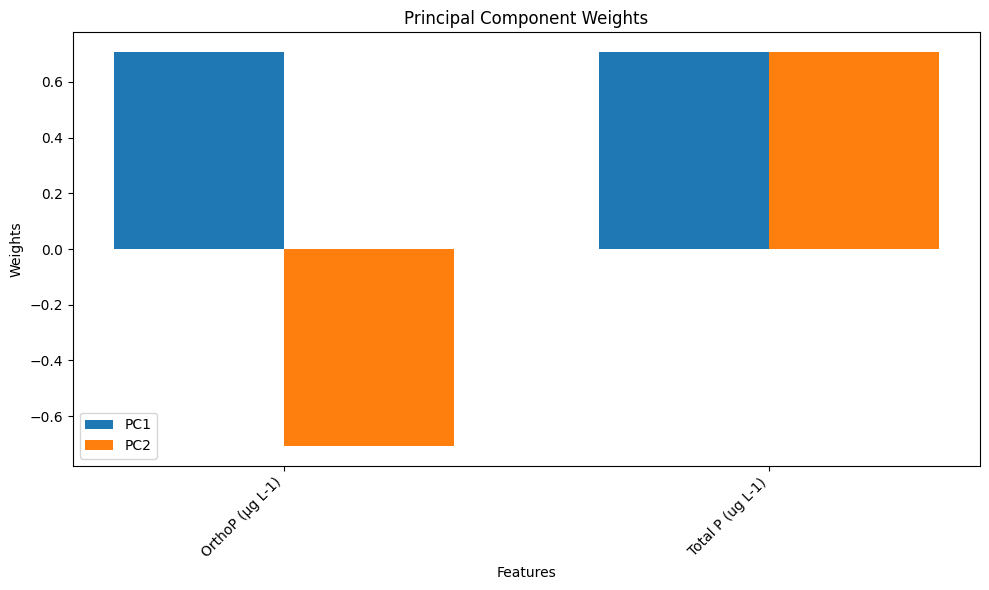

/scratch/local/51791593/ipykernel_618980/3403185151.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_categories))  # Generate a colormap


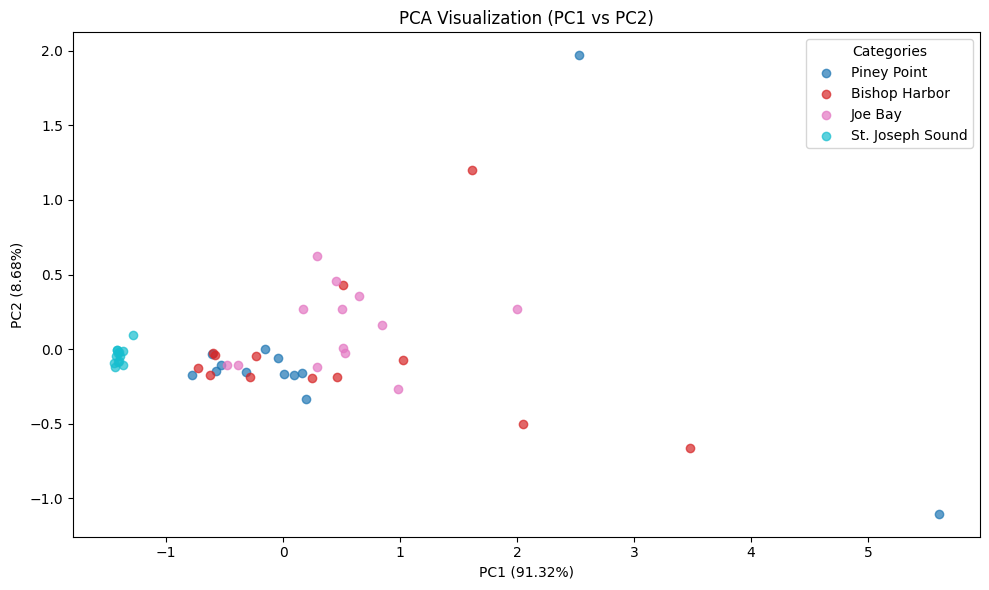

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_6 = data_2.drop(columns=["Month", "Year", "Location"])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_6)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pc_weights = pca.components_
features = data_6.columns
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = np.arange(len(features))
ax.bar(x - width/2, pc_weights[0], width, label="PC1")
ax.bar(x + width/2, pc_weights[1], width, label="PC2")
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")
ax.set_title("Principal Component Weights")
ax.set_xlabel("Features")
ax.set_ylabel("Weights")
ax.legend()
plt.tight_layout()
plt.show()
categories = data_2["Location"]
fig, ax = plt.subplots(figsize=(10, 6))
unique_categories = categories.unique()
colors = plt.cm.get_cmap("tab10", len(unique_categories))
for i, category in enumerate(unique_categories):
    category_data = pca_result[categories == category]
    ax.scatter(category_data[:, 0], category_data[:, 1], label=category, color=colors(i), alpha=0.7)
label_X = f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)"
label_Y = f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)"
ax.set_xlabel(label_X)
ax.set_ylabel(label_Y)
ax.set_title("PCA Visualization (PC1 vs PC2)")
ax.legend(title="Categories")
plt.tight_layout()
plt.show()